In [3]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Load the dataset
data = pd.read_csv('C:/Users/customer_churn.csv')

# Let's take a look at the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check the data types and missing values
data.info()

# Convert 'TotalCharges' to numeric and handle errors by coercing them to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for missing values again
data.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
# Handle missing values in 'TotalCharges' by replacing them with the median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Convert 'Churn' into binary format
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Drop 'customerID' as it doesn't provide any useful information for the model
data.drop('customerID', axis=1, inplace=True)

# Perform one-hot encoding on categorical features
data_encoded = pd.get_dummies(data)

# Display the first few rows of the preprocessed dataframe
data_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


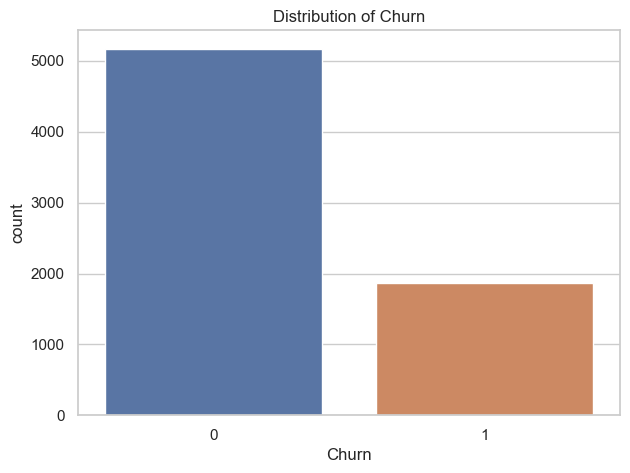

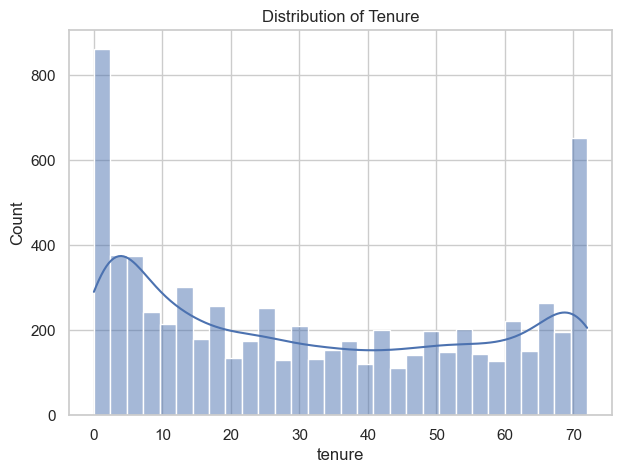

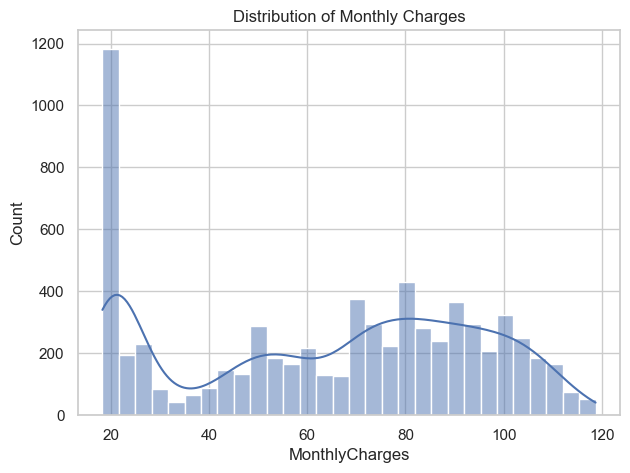

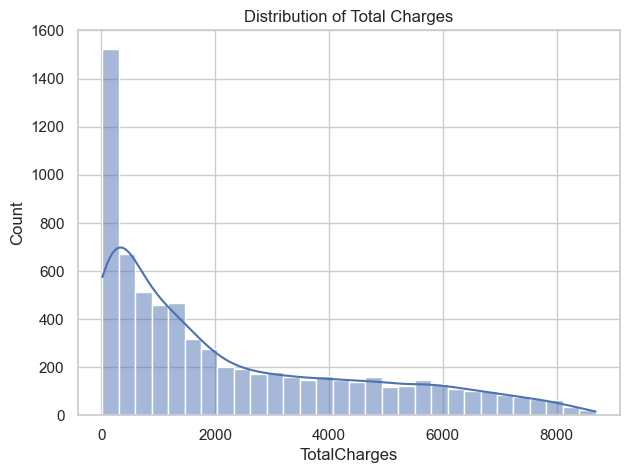

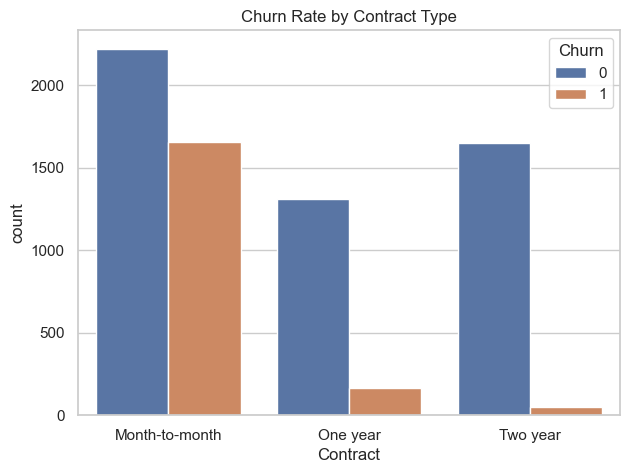

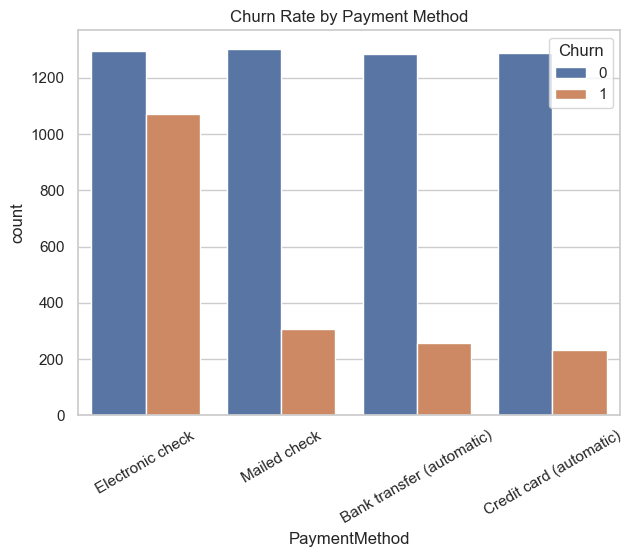

In [7]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns



# Convert 'TotalCharges' to numeric, handling errors by coercing them to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Set the style of the plots
sns.set(style="whitegrid")

# Plot the distribution of churn
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='Churn')
plt.title('Distribution of Churn')
plt.show()

# Plot the distribution of tenure
plt.figure(figsize=(7, 5))
sns.histplot(data=data, x='tenure', bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.show()

# Plot the distribution of MonthlyCharges
plt.figure(figsize=(7, 5))
sns.histplot(data=data, x='MonthlyCharges', bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

# Plot the distribution of TotalCharges, after dropping missing values
plt.figure(figsize=(7, 5))
sns.histplot(data=data.dropna(), x='TotalCharges', bins=30, kde=True)
plt.title('Distribution of Total Charges')
plt.show()

# Plot the churn rate by Contract
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='Contract', hue='Churn')
plt.title('Churn Rate by Contract Type')
plt.show()

# Plot the churn rate by PaymentMethod
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=30)
plt.title('Churn Rate by Payment Method')
plt.show()


In [8]:
# Split the data into features and target
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42) 

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
accuracy, precision, recall, roc_auc


(0.7963094393186657, 0.6604477611940298, 0.4745308310991957, 0.693346496630679)

In [9]:
# Get the feature importances
importances = model.feature_importances_

# Create a DataFrame to display the features and their importances
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
importances_df


,Feature,Importance
3,TotalCharges,0.164168
1,tenure,0.141796
2,MonthlyCharges,0.137246
36,Contract_Month-to-month,0.045486
43,PaymentMethod_Electronic check,0.032350
18,OnlineSecurity_No,0.031956
16,InternetService_Fiber optic,0.028439
27,TechSupport_No,0.023705
0,SeniorCitizen,0.019924
5,gender_Male,0.018246
